## Libraries Used

In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error , r2_score , mean_squared_error, mean_absolute_percentage_error

le = LabelEncoder()
scaler = StandardScaler()
rScaller = RobustScaler()

## Data Overview

In [211]:
df = pd.read_csv("housing.csv" , sep = "," , encoding = 'utf-8')

In [212]:
# getting the first 10 elements of the dataset by using head() function
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [213]:
# getting Information about the columns by using info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [214]:
# getting it's statistical values by using describe() function
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [215]:
# getting the dimensions of the dataset by using shape() function
df.shape

(20640, 10)

##### Dataset consists of 20640 rows and 11 columns

#### Checking if any value in the dataset is duplicated

In [216]:
df.duplicated().any()

False

#### Fortunately There's no item duplicated in the dataset

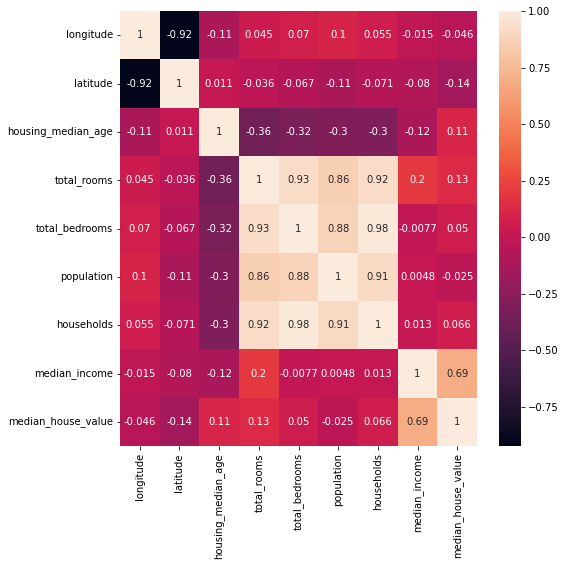

In [217]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [218]:
##### There's a multicolinearity between households and population also between total bedrooms and total rooms
##### also a coleration between Median income and median_value_house

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

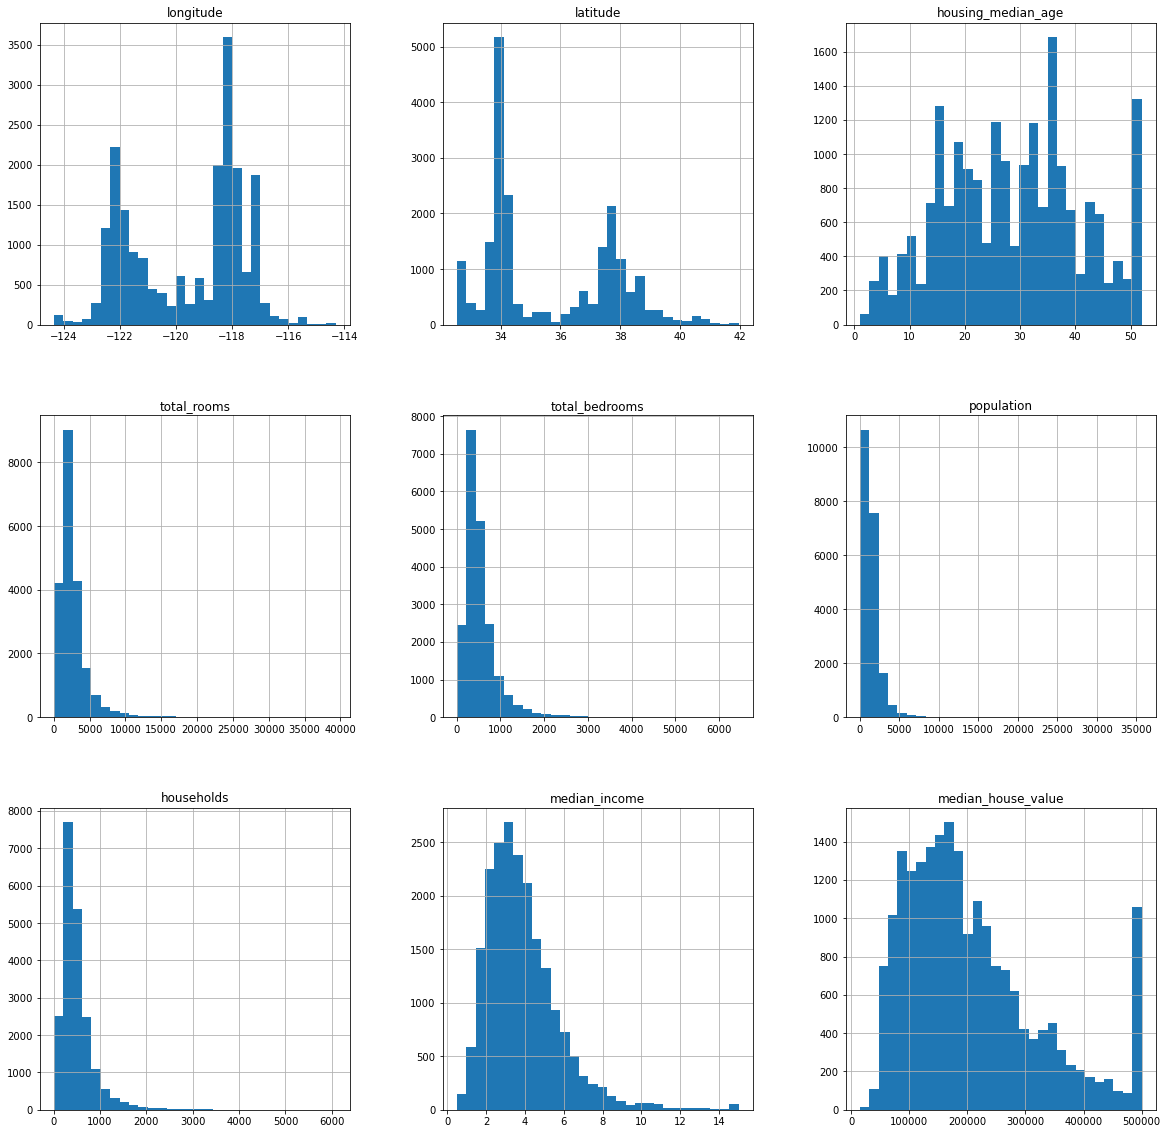

In [219]:
# drawing hist plot graphs for all columns
df.hist(bins=30,figsize=[20,20])

##### as we see from the graphs above most of them are right skewed so we have to fix it

### but first we need to fix the null values if there

#### Checking for the total number of values missing

In [220]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

##### total bedrooms column is the only column that has missing data in it (207 missing values)

##### before fixing it we have to see it's distrbition

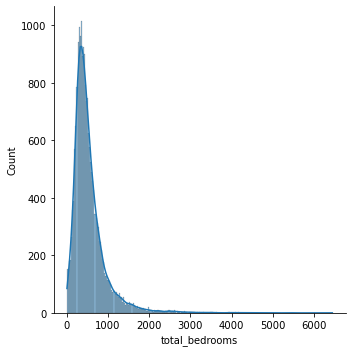

In [221]:
sns.displot(data=df, x="total_bedrooms", kde=True)

##### the graph above it appears to be right skewed so we will have to fix it 

##### to make sure it has outlier we will draw a box plot to see the data in a better way

<AxesSubplot:xlabel='total_bedrooms'>

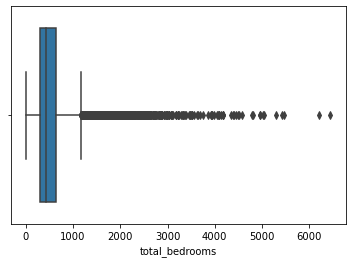

In [222]:
sns.boxplot(x=df["total_bedrooms"])

##### as I expected there's so many outliers in the plot that we need to handle

In [223]:
# dividing the total number of householders over the population to get the ratio between them and multiplying it by 100

df.households.sum()/df.population.sum()*100

35.04369203285723

##### there is a ratio 1 householder to 3 people there 

#### Getting a Relation between total bedrooms and total rooms

In [224]:
# dividing the total number of bedrooms over the total number of rooms to get the ratio between them and multiplying it by 100

df.total_bedrooms.sum()/df.total_rooms.sum()*100

20.201975473395812

##### and in the end of data preprocessing it appears that by dividing the total number of bedrooms over the total number of rooms the ratio's here saying that for every bedroom constructed there's another nearly 5 rooms else also constructed

##### getting a line plot to show the differences between the bedrooms and all rooms (they both are right skewed)

<AxesSubplot:xlabel='total_bedrooms', ylabel='total_rooms'>

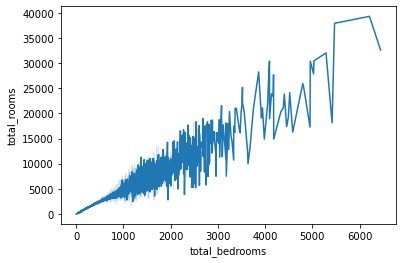

In [225]:
sns.lineplot(data=df, x="total_bedrooms", y="total_rooms")

##### Also showing the same graph but with scatter plot to see the coleration between them ,get a better view (below)

<AxesSubplot:xlabel='total_bedrooms', ylabel='total_rooms'>

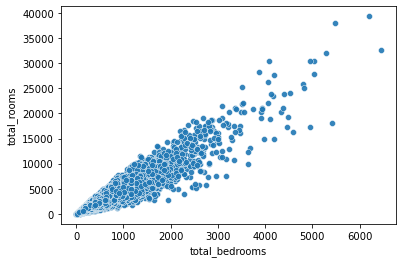

In [226]:
sns.scatterplot(data=df, x="total_bedrooms", y="total_rooms",palette="deep",alpha=0.9)

##### handling missing values in bedrooms column by inserting the average of the columns in it

In [227]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df.population.mean())

In [228]:
# checking again to see if the problem handeled

df['total_bedrooms'].isnull().any()

False

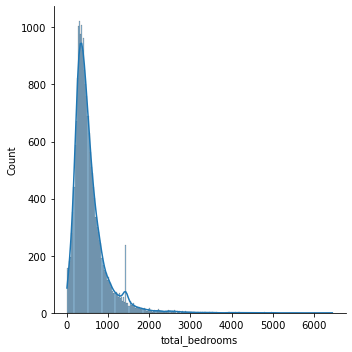

In [229]:
sns.displot(data=df, x="total_bedrooms", kde=True)

In [230]:
# dividing the total number of bedrooms over the total number of rooms to get the ratio between them and multiplying it by 100

df.total_bedrooms.sum()/df.total_rooms.sum()*100

20.74436890094695

##### as we see from the graphs above and the ratio between bedrooms and total rooms are nearly the same after filling the missing data

In [231]:
# getting Information about the columns by using info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


##### as we see ocean proxomity column is object type so we need to cast it to the proper datatype

In [232]:
# transforming the datatype (Encoding)
df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])

In [233]:
# getting all possible values in column by using value_counts() function
df["ocean_proximity"].value_counts()

0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64

In [234]:
# displaying the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.5 MB


#### now we can handle the outliers

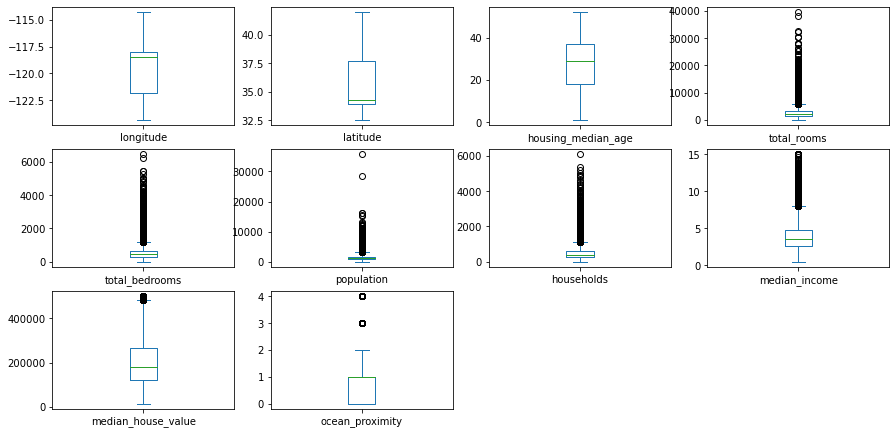

In [235]:
# drawing a box plots for all columns

df.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10))
plt.show()

##### we will handle only a part of the outliers but not all in order to not spoiling the dataset using conditions

In [236]:
# updating the dataframe without affecting on the dataset

df = df[(df['total_rooms']<=22000)&(df['median_income']<=13)&(df['households']<=4000)&(df['population']<=12500)&(df['total_bedrooms']<=4500)&(df['median_house_value']<=500000)&(df['ocean_proximity']<=2)]

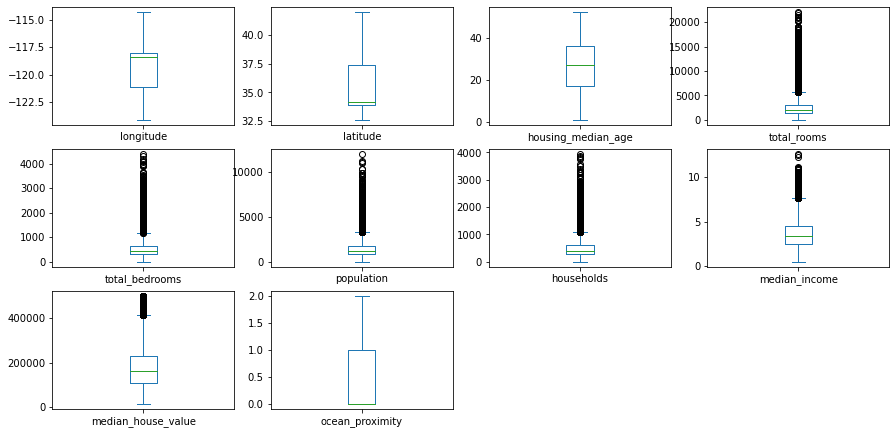

In [237]:
# drawing a box plots for all columns after handling outliers

df.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10))
plt.show()

##### The right skewed outliers are shortened but not all of it in order to not sabotage the dataset

##### outliers are handeled without affecting the dataframe

## Variance inflation factor (VIF)

- Variance inflation factor (VIF) is used to detect the severity of multicollinearity in the ordinary least square
- (OLS) regression analysis
- VIF > 10 ---- Yes multicollinearity
- VIF < 10 ---- No multicollinearity

In [238]:
# making a new dataframe for VIF
vifData = pd.DataFrame()

In [239]:
# getting all columns in the dataset in vifData frame
vifData["columns"] = df.columns

In [240]:
# getting values of variances through iterating over the original dataframe
vifData["VIF"] = [variance_inflation_factor(df.values, i)
                  for i in range(len(df.columns)) # 11
                 ]

In [241]:
# displaying all the dataframe (VIF)
vifData.head(len(df.columns)) # 11

,columns,VIF
0,longitude,835.339535
1,latitude,778.304578
2,housing_median_age,8.133896
3,total_rooms,28.224510
4,total_bedrooms,32.912812
5,population,20.176638
6,households,54.380000
7,median_income,17.374282
8,median_house_value,12.747091
9,ocean_proximity,3.604411


##### there's a multicollinearity in all columns except ocean proximity and housing median age attributes because they are less than 10

## Train Test Spliting

In [242]:
x = df.drop(['median_house_value','longitude','latitude','ocean_proximity' , 'total_bedrooms', 'households'], axis=1).values
y = df['median_house_value'].values

### getting a sammary of the dataset before applying the regression models

In [243]:
X2 = sm.add_constant(x)
est = sm.OLS(y , X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     3362.
Date:                Tue, 06 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:41:48   Log-Likelihood:            -1.8947e+05
No. Observations:               15109   AIC:                         3.789e+05
Df Residuals:                   15104   BIC:                         3.790e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.448e+04   2409.127     -6.012      0.0

In [244]:
X2 = sm.add_constant(x)
est = sm.GLM(y , X2)
est2 = est.fit()
print(est2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                15109
Model:                            GLM   Df Residuals:                    15104
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                      4.5688e+09
Method:                          IRLS   Log-Likelihood:            -1.8947e+05
Date:                Tue, 06 Sep 2022   Deviance:                   6.9008e+13
Time:                        10:41:48   Pearson chi2:                 6.90e+13
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.448e+04   2409.127     -6.012      0.0

In [245]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.25 , random_state = 42,shuffle=True)

In [246]:
x_train.shape

(11331, 4)

In [247]:
y_train.shape

(11331,)

In [248]:
x_test.shape

(3778, 4)

#### scalling the data

In [249]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Machine Learning Models and their evaluations

### Linear Regression

In [250]:
# transforming the data
x_train = rScaller.fit_transform(x_train)
x_test = rScaller.fit_transform(x_test)

In [251]:
# fitting the data
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

LinearRegression()

In [252]:
# displaying the scores of train and test
print(lr.score(x_train_scaled , y_train))
print(lr.score(x_test_scaled , y_test))

0.46927536073423337
0.476229367607108


In [253]:
# making a new dataframe that contain the tests
y_pred_linear = lr.predict(x_test_scaled)
dfLinear = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred_linear})

In [254]:
# displaying the first 10 elements of the dataframe
dfLinear.head(10)

,Y_test,Y_pred
0,166700.0,172570.719805
1,164600.0,122255.114930
2,90800.0,151884.572512
3,187500.0,75036.613624
4,182500.0,222238.923426
5,73400.0,139991.948988
6,120000.0,129618.679963
7,96200.0,173152.655950
8,166200.0,145653.427198
9,280300.0,303279.623699


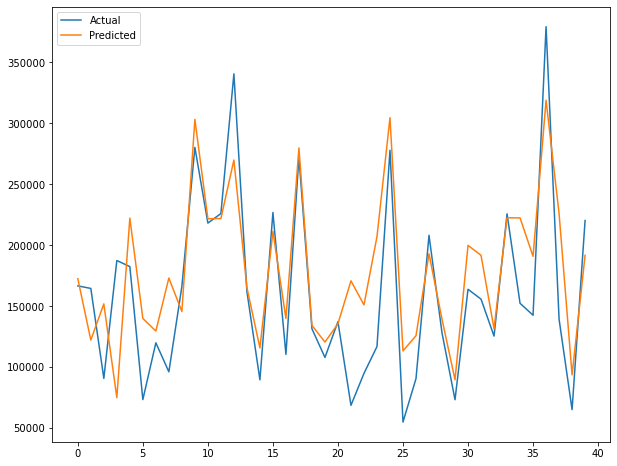

In [255]:
# drawing a plot graph to see the model's efficiency
plt.figure(figsize=(10,8))
plt.plot(dfLinear[0:40])
plt.legend(['Actual' , 'Predicted'])

In [256]:
# getting the r squared score
reg_score = r2_score(y_test , y_pred_linear)
reg_score

0.476229367607108

In [257]:
# getting the adjusted r squared score

p = len(x_train_scaled[0])
n = len(y_train)
adj_R2 = 1-(1-reg_score)*(n-1)/(n-p-1)
adj_R2

0.47604438769102364

In [258]:
# seeing if adjusted r square is less than the score (if false then there's a problem in the data)
adj_R2 < reg_score

True

In [259]:
# getting the mean squared error of the test
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
rmse_linear

66567.3217892384

In [260]:
# getting the mean absolute percentage error of the test
mpae = mean_absolute_percentage_error(y_test, y_pred_linear)
mpae*100

34.04317047737385

### Lasso Regression

In [261]:
# fitting the data

las = Lasso(alpha=0.7)
las.fit(x_train_scaled, y_train)

Lasso(alpha=0.7)

In [262]:
# displaying the scores of train and test

print(las.score(x_train_scaled , y_train))
print(las.score(x_test_scaled , y_test))

0.46927535991904734
0.4762296914741144


In [263]:
# making a new dataframe that contain the tests

y_pred_lasso = las.predict(x_test_scaled)
dfLasso = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred_lasso})

# displaying the first 10 elements of the dataframe
dfLasso.head(10)

,Y_test,Y_pred
0,166700.0,172570.011920
1,164600.0,122252.297595
2,90800.0,151889.306578
3,187500.0,75039.801285
4,182500.0,222236.756452
5,73400.0,139994.406399
6,120000.0,129620.135548
7,96200.0,173152.430301
8,166200.0,145647.857649
9,280300.0,303277.879167


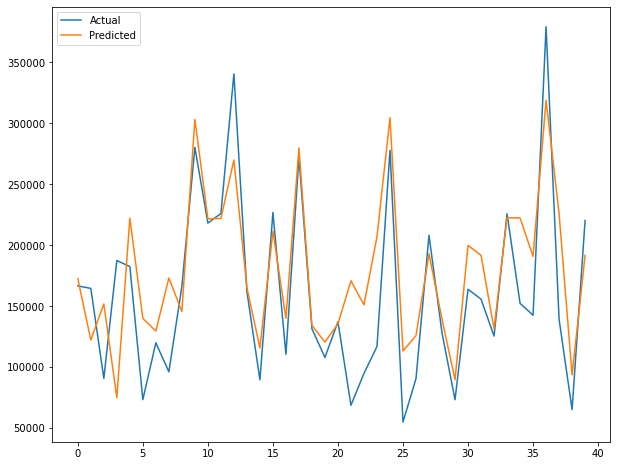

In [264]:
# drawing a plot graph to see the model's efficiency
plt.figure(figsize=(10,8))
plt.plot(dfLasso[0:40])
plt.legend(['Actual' , 'Predicted'])

In [265]:
# getting the r squared score
lasso_score = r2_score(y_test , y_pred_lasso)
lasso_score

0.4762296914741144

In [266]:
# getting the adjusted r squared score
p = len(x_train_scaled[0])
n = len(y_train)
adj_R2 = 1-(1-lasso_score)*(n-1)/(n-p-1)
adj_R2

0.47604471167241014

In [267]:
# seeing if adjusted r square is less than the score (if false then there's a problem in the data)
adj_R2 < lasso_score

True

In [268]:
# getting the mean squared error of the test
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
rmse_lasso

66567.30120870062

In [269]:
# getting the mean absolute percentage error of the test
mpae = mean_absolute_percentage_error(y_test, y_pred_lasso)
mpae*100

34.04343805919076

### Ridge Regression

In [270]:
# fitting the data

rid = Ridge(alpha=0.7)
rid.fit(x_train_scaled, y_train)

Ridge(alpha=0.7)

In [271]:
# displaying the scores of train and test

print(rid.score(x_train_scaled , y_train))
print(rid.score(x_test_scaled , y_test))

0.46927535843385604
0.47622881066915257


In [272]:
# making a new dataframe that contain the tests

y_pred_ridge = rid.predict(x_test_scaled)
dfRidge = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred_ridge})

# displaying the first 10 elements of the dataframe
dfRidge.head(10)

,Y_test,Y_pred
0,166700.0,172571.976795
1,164600.0,122257.187992
2,90800.0,151888.802567
3,187500.0,75043.635944
4,182500.0,222235.048095
5,73400.0,139996.021833
6,120000.0,129621.709316
7,96200.0,173154.202350
8,166200.0,145654.080474
9,280300.0,303271.693283


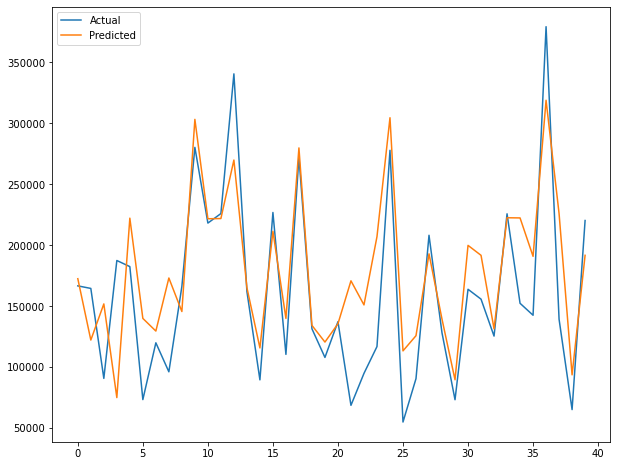

In [273]:
# drawing a plot graph to see the model's efficiency
plt.figure(figsize=(10,8))
plt.plot(dfRidge[0:40])
plt.legend(['Actual' , 'Predicted'])

In [274]:
# getting the r squared score
ridge_score = r2_score(y_test , y_pred_ridge)
ridge_score

0.47622881066915257

In [275]:
# getting the adjusted r squared score
p = len(x_train_scaled[0])
n = len(y_train)
adj_R2 = 1-(1-ridge_score)*(n-1)/(n-p-1)
adj_R2

0.47604383055637467

In [276]:
# seeing if adjusted r square is less than the score (if false then there's a problem in the data)
adj_R2 < ridge_score

True

In [277]:
# getting the mean squared error of the test
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
rmse_ridge

66567.35718054898

In [278]:
# getting the mean absolute percentage error of the test
mpae = mean_absolute_percentage_error(y_test, y_pred_ridge)
mpae*100

34.043828932596746

### Random Forest Regression

In [279]:
# fitting the data

rfr = RandomForestRegressor()
rfr.fit(x_train_scaled, y_train)

RandomForestRegressor()

In [280]:
# displaying the scores of train and test

print(rfr.score(x_train_scaled , y_train))
print(rfr.score(x_test_scaled , y_test))

0.9266413540945774
0.4828859375854275


In [281]:
# making a new dataframe that contain the tests

y_pred_rfr = rfr.predict(x_test_scaled)
dfrfr = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred_rfr})

# displaying the first 10 elements of the dataframe
dfrfr.head(10)

,Y_test,Y_pred
0,166700.0,143791.0
1,164600.0,154679.0
2,90800.0,215099.0
3,187500.0,95999.0
4,182500.0,183905.0
5,73400.0,137436.0
6,120000.0,124602.0
7,96200.0,145184.0
8,166200.0,160055.0
9,280300.0,300950.0


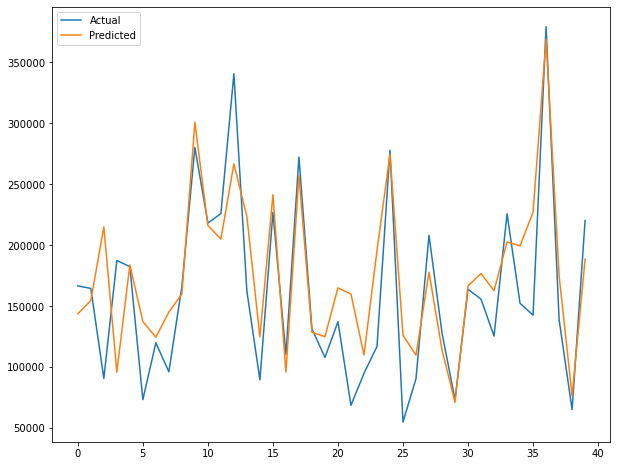

In [282]:
# drawing a plot graph to see the model's efficiency
plt.figure(figsize=(10,8))
plt.plot(dfrfr[0:40])
plt.legend(['Actual' , 'Predicted'])

In [283]:
# getting the r squared score
rfr_score = r2_score(y_test , y_pred_rfr)
rfr_score

0.4828859375854275

In [284]:
# getting the adjusted r squared score
p = len(x_train_scaled[0])
n = len(y_train)
adj_R2 = 1-(1-rfr_score)*(n-1)/(n-p-1)
adj_R2

0.48270330856815236

In [285]:
# seeing if adjusted r square is less than the score (if false then there's a problem in the data)
adj_R2 < rfr_score

True

In [286]:
# getting the mean squared error of the test
rmse_rfr = mean_squared_error(y_test, y_pred_rfr, squared=False)
rmse_rfr

66142.96913274277

In [287]:
# getting the mean absolute percentage error of the test
mpae = mean_absolute_percentage_error(y_test, y_pred_rfr)
mpae*100

33.6277876102476

#### Comparing between different models in terms of R Squared and Root mean square error

In [288]:
models = ['LinearRegression' , 'LassoRegression' , 'RidgeRegression', 'RandomForestRegression']
data = [[reg_score , rmse_linear], [lasso_score , rmse_lasso],[ridge_score , rmse_ridge],[rfr_score , rmse_rfr]]
cols = ['r2_score' , 'RMSE']
pd.DataFrame(data=data , index = models , columns = cols).sort_values(ascending=False , by = ['r2_score'])

,r2_score,RMSE
RandomForestRegression,0.482886,66142.969133
LassoRegression,0.476230,66567.301209
LinearRegression,0.476229,66567.321789
RidgeRegression,0.476229,66567.357181


##### notice that the dataset is non linear however we applied linear regressions algorithims on it so the models have very low accuarcy 

##### they are good and perfect here but not recommended to apply on non linear datasets